David Íñiguez and Jaume Sánchez




**Stochastic gradient descent for SVM**

In [47]:
import numpy as np
import matplotlib.pyplot as plt

We will use the *same* data sets used in the previous laboratory. Note that, although not used, we have both options available: separable and non-separable case.

In [48]:
def generate_points (n, separable = True): #where n is the number of points in each class
    m1 = [0.,0.]
    s1 = [[1,-0.9],[-0.9,1]]
    points1 = np.random.multivariate_normal(m1, s1, size=n)
    if separable == True: # Separable dataset
        m2 = [3.,6.]
        s2 = [[1,0],[0,1]]
    else:  # Non-separable dataset
        m2 = [1.,2.]
        s2 = [[1,0],[0,1]]
    points2 = np.random.multivariate_normal(m2, s2, size=n)
    x = np.concatenate((points1,points2))
    y1 = np.ones(n)
    y2 = (-1)*y1
    y = np.concatenate((y1,y2))
    return(x.T,y)

The primal problem can be described as:

In [49]:
def f(x,y,w,b,lam):
  return(lam/2)*(w.T@w)+ np.sum(np.maximum(0, 1 - y*(  (w.T@x) + b)   )  )

Let us implement the Stochastic gradient algorithm, as explained in the laboratory.

In [50]:
def stochastic(x,y,mu,lam,muplus,itermax):

  n = x.shape[0] # =2 in this case
  m = x.shape[1] #the total number of points, both positive and negative

  w = np.random.rand(n) #random vector of dimension 2 in this case
  b = np.random.rand(1)[0] #to select just the number
  values = []

  epoch = 0
  while(epoch < itermax):

    perm = np.random.permutation(m) #use the same permutation for both x and y
    x = x[:,perm]
    y = y[perm]

    for i in range(m): #go over all the samples

      if( ( y[i]*(w.T@ x[:,i] + b) )  > 1):
        w += -(1/mu)*lam*w
        #b remains the same
      else:
        w += -(1/mu)*(lam*w - y[i]*x[:,i])
        b += (1/mu)*y[i]

    mu += muplus
    epoch+=1

    values.append(np.log(f(x,y,w,b,lam))) #this is asked in exercise 3
  return(w,b,values)

This function will allow us to plot the boundary decision in the following exercises

In [51]:
def plot_boundary (x,w,b,f_values):
  z = np.linspace(-8, 8, 100)
  plt.scatter(x[0,:100], x[1,:100], c = 'r', label = 'Label = 1')
  plt.scatter(x[0,100:], x[1,100:], c = 'b', label = 'Label = -1')
  plt.plot(z, -(w[0]*z + b+1)/w[1], 'b', label='K = -1') #K = 1
  plt.plot(z, -(w[0]*z + b) / w[1], 'black', label='K = 0') #K = 0
  plt.plot(z, -(w[0]*z + b-1) / w[1], 'r',label='K = 1') #K = -1
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title("Obtained boundary")
  plt.show()

  plt.plot(f_values)
  plt.title("Logarithm of the objective function")
  plt.xlabel("Epochs")
  plt.show()


## Exercise 1

We will do different experiments. Let us start computing the classical stochastic gradient descent by setting $\lambda = 10^{-4}$ and by varying the increased values of $\mu$ by $1, 0.5$ or $0.1$.

Once done that, we will repeat the experiment but setting  $\lambda = 10^{-2}$. In order to do a fair comparison, we will use the same dataset in all the experiments.

Note that we are asked to perform a plot of the logarithm of $f(w, b)$ along each epoch for the stochastic gradient descent, minibatch and gradient descent. We will plot it now just after we plot the classification lines (for each example).

Increasing mu by 1
w = [-0.46057148 -0.51196769]
b = 1.6066591636060286


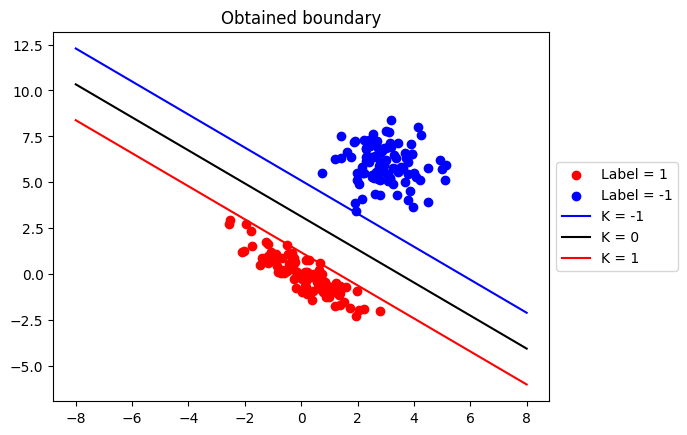

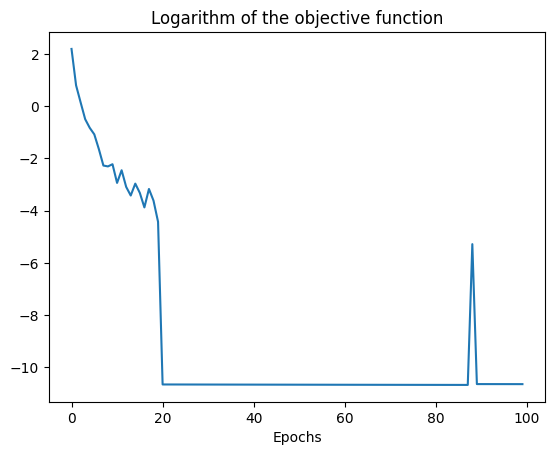

Increasing mu by 0.5
w = [-0.46525187 -0.5131562 ]
b = 1.6086562121610002


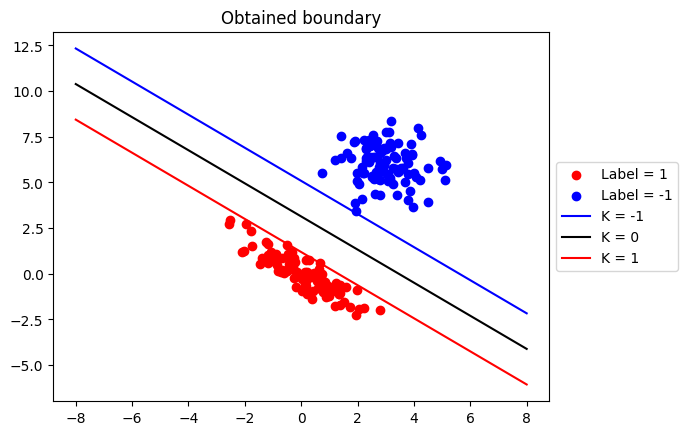

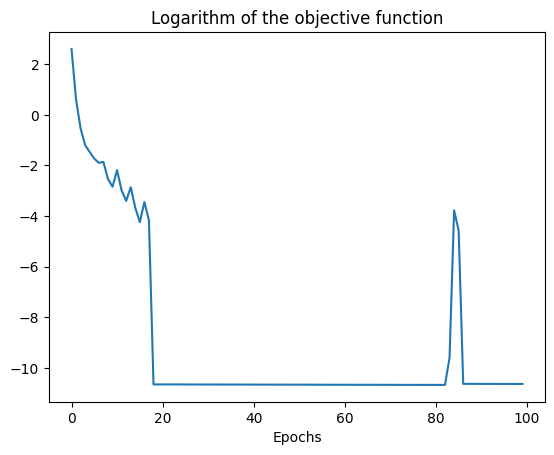

Increasing mu by 0.1
w = [-0.45544344 -0.50922506]
b = 1.606775674876676


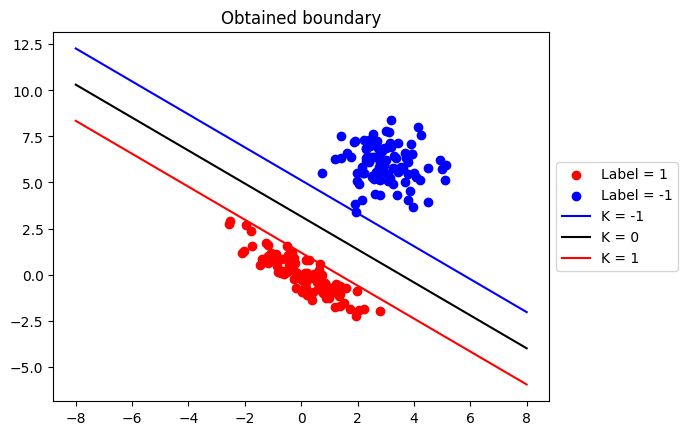

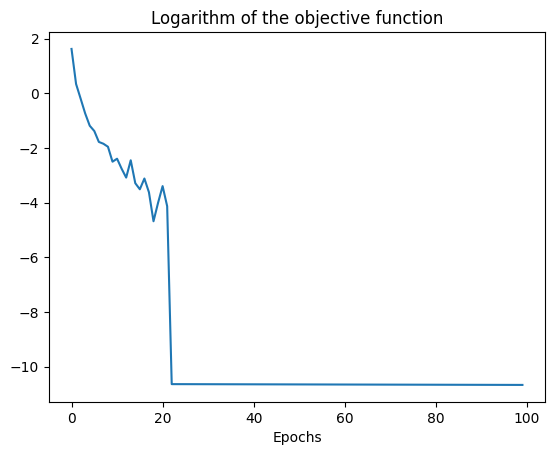

In [52]:
#Exercise 1
#Lambda = 1e-4

increased_mu = [1,0.5,0.1]
x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = stochastic(x, y, 100,1e-4, mu,100)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

Let us now change $λ=10^{-2}$.

Increasing mu by 1
w = [-0.43046361 -0.51322944]
b = 1.595453051440202


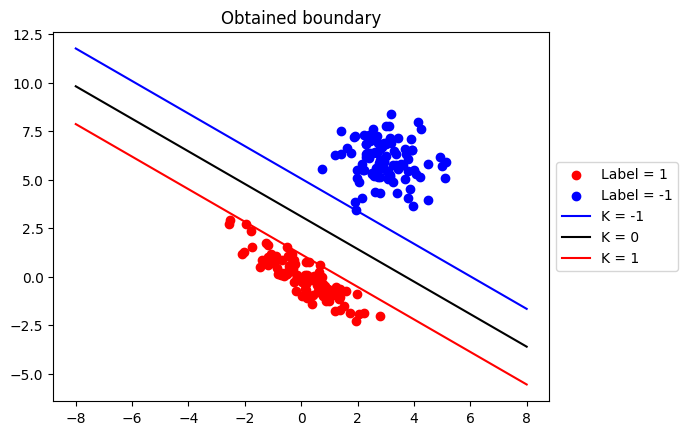

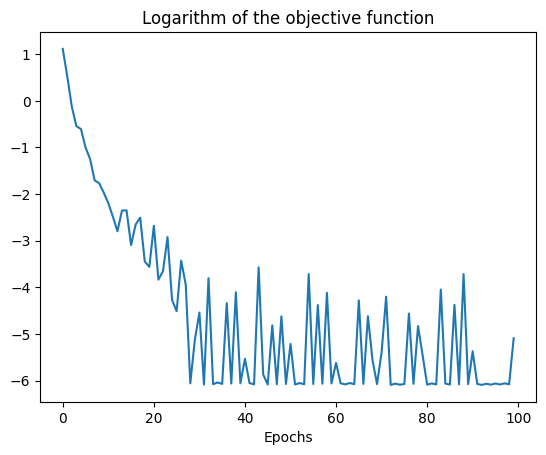

Increasing mu by 0.5
w = [-0.43891091 -0.52204748]
b = 1.6028569359199398


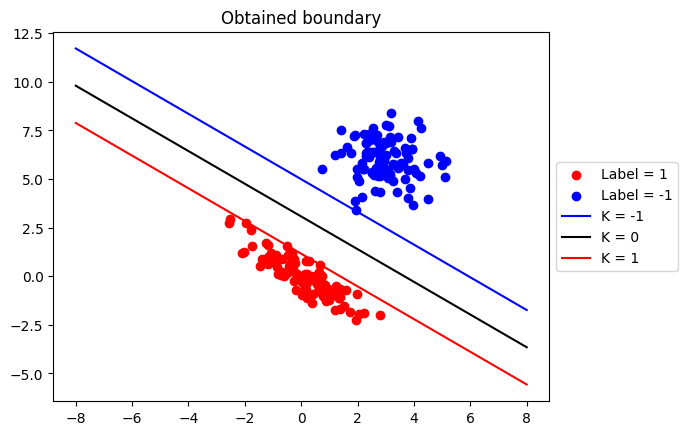

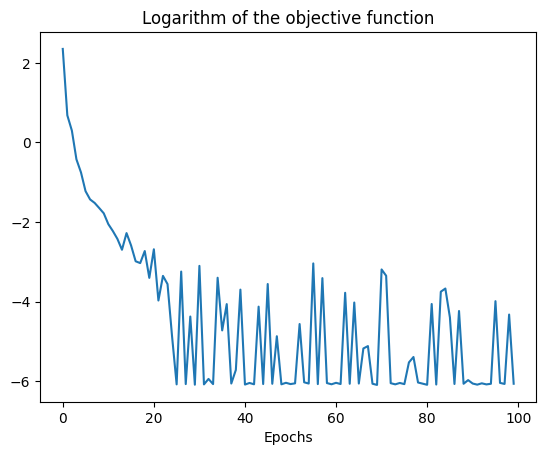

Increasing mu by 0.1
w = [-0.44165022 -0.52115554]
b = 1.6101963113196307


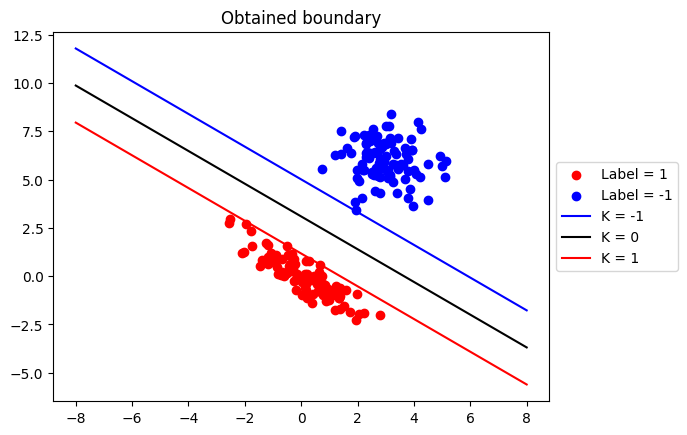

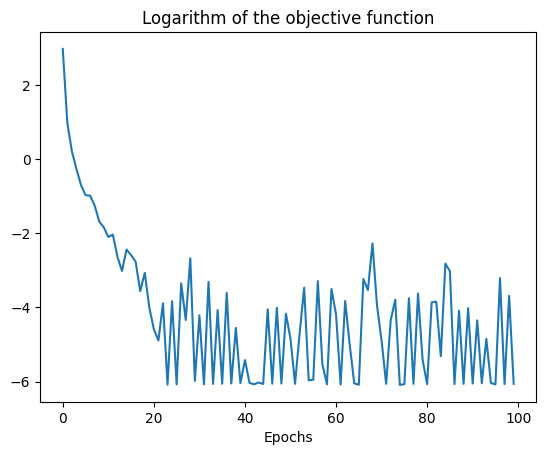

In [53]:
#Exercise 1
#Lambda = 1e-2

increased_mu = [1,0.5,0.1]
#x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = stochastic(x, y, 100,1e-2, mu,100)
  #print(f_values)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

One can see that regardless of the chosen values of the parameters, the obtained boundary fits well in any case. It is also worth mentioning that in all cases ($\lambda = 10^{-4}$ or $\lambda = 10^{-2}$) changing the value that we add to $\mu$ it hasn't had a big effect on the final solution as we can see on the values of $w$ and $b$ (althoug it makes a little difference at the level lines when $K=1$ and $K=-1$).

Note that in the logarithm of the objective function it is expected to obtain negative values. That is because we are applying the logarithm to these values, so, the more negative the values are the smaller is the error. This agrees with what we can see in the plots; note that regardless of the value of $\lambda$ and $\mu$ (the values that we add to the variable), the error is decreasing among the epochs. However, we can see that for smaller lambda values the error stabilizes earlier and fluctuates (a lot) less.

## Exercise 2

Let us implement the Mini-Batch algorithm, as explained in the laboratory, in order to compare it with the previous algorithm.

In [54]:
def batch(x,y,mu,lam, muplus,itermax,size):

  n = x.shape[0] # =2 in this case
  m = x.shape[1] #the total number of points, both positive and negative

  w = np.random.rand(n) #random vector of dimension 2 in this case
  b = np.random.rand(1)[0] #to select just the number
  values = []

  epoch = 0
  n_batch = m//size

  while(epoch < itermax):

    perm = np.random.permutation(m) #shuffle data after each epoch
    x = x[:,perm]
    y = y[perm]


    for i in range(n_batch): #go over all the minibatch

      x_batch = x[:, i*size:(i+1)*size] #select the corresponding points
      y_batch = y[i*size:(i+1)*size] #select the corresponing labels to the points

      aux_w = np.zeros(w.shape)
      aux_b = 0
      for j in range(x_batch.shape[1]): # for all the elements in the minibatch
        if( ( y_batch[j] * (w.T@x_batch[:,j] + b)  ) <= 1): #otherwise the value will be 0
          aux_w += y_batch[j] * x_batch[:,j]
          aux_b +=y_batch[j] #the sign is cancelled

      w += -(1/mu)*(lam*w -aux_w)
      b += (1/mu)*aux_b

    mu += muplus
    epoch+=1
    values.append(np.log(f(x,y,w,b,lam)))
  return (w,b,values)

Again, we will do many experiments. First we will set the value of $λ$ to $10^{-4}$ and we will try different batch sizes ($10,20,50$). To finish the experiments we will do the same but now setting $λ$ to $10^{-2}$ . Note that we are also varying the value we are adding to mu and that we are using the same dataset than in exercise 1.

Starting with batch size equals to $10$.

Increasing mu by 1
w = [-0.44917955 -0.51358034]
b = 1.607830839420089


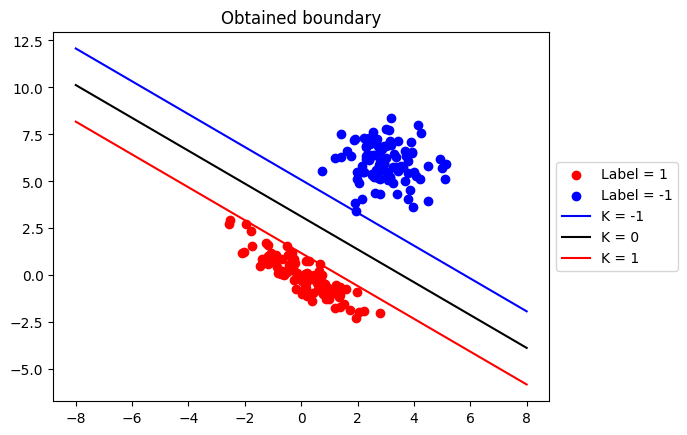

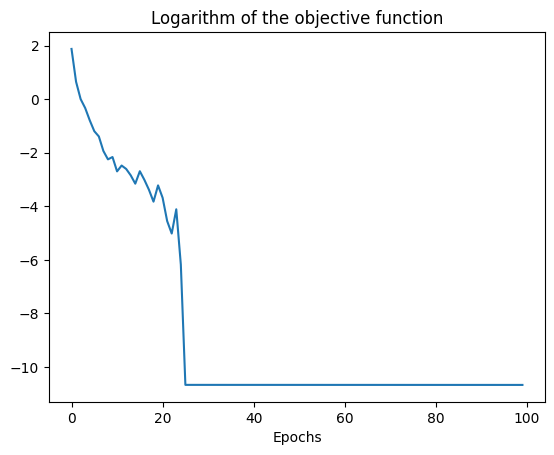

Increasing mu by 0.5
w = [-0.47224929 -0.50754716]
b = 1.6083569379098963


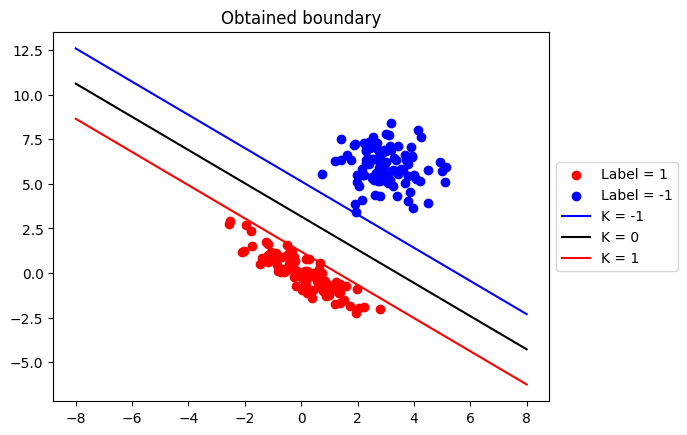

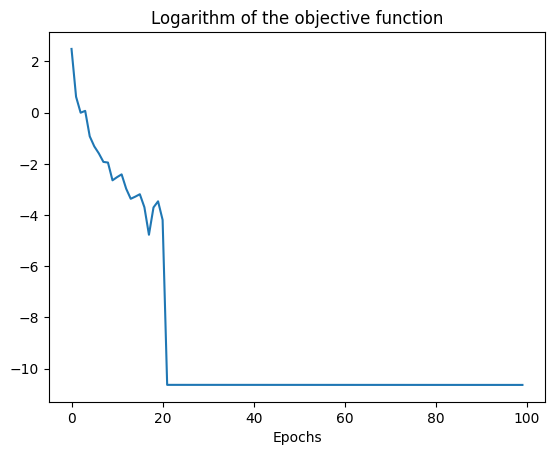

Increasing mu by 0.1
w = [-0.46194311 -0.50901006]
b = 1.6145677741105373


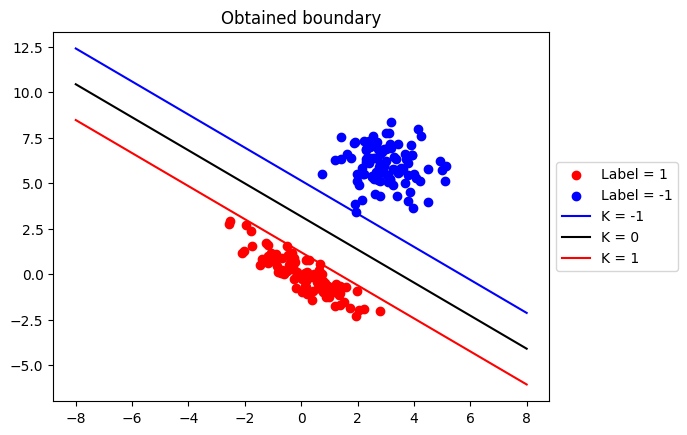

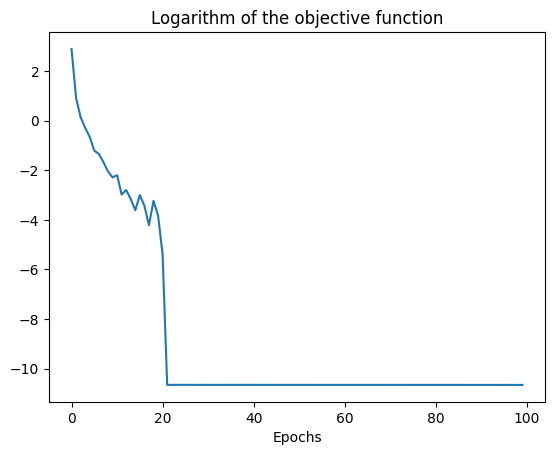

In [55]:
#Exercise 2
#Lambda= 1e-4, Batch size = 10
increased_mu = [1,0.5,0.1]
#x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = batch(x, y, 100,1e-4, mu,100,10)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

Let us change the batch size to $20$.

Increasing mu by 1
w = [-0.4616811  -0.50929695]
b = 1.6056613430491153


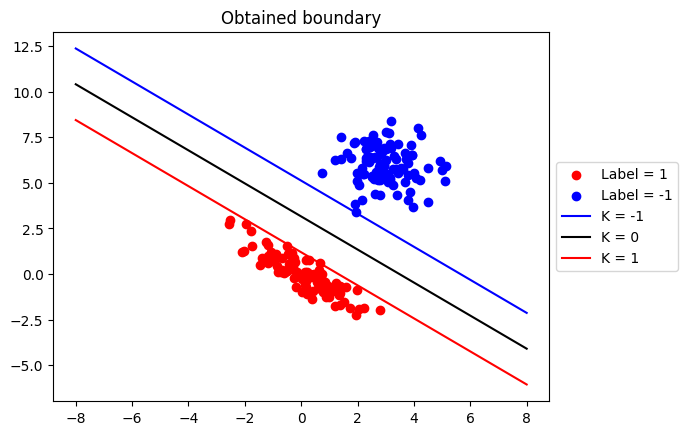

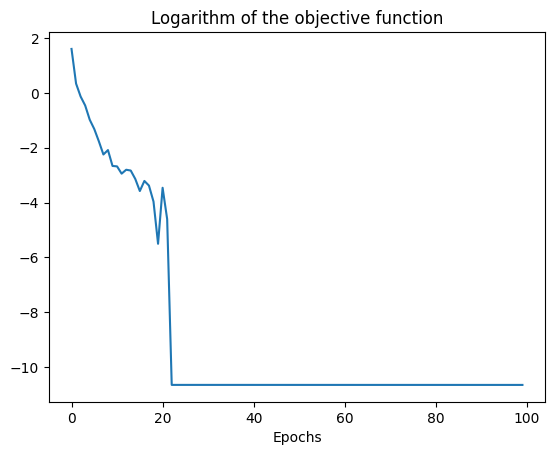

Increasing mu by 0.5
w = [-0.46347771 -0.52114578]
b = 1.6175199822814552


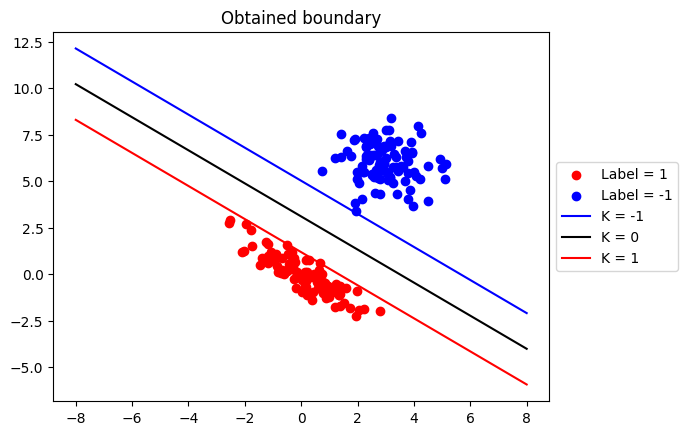

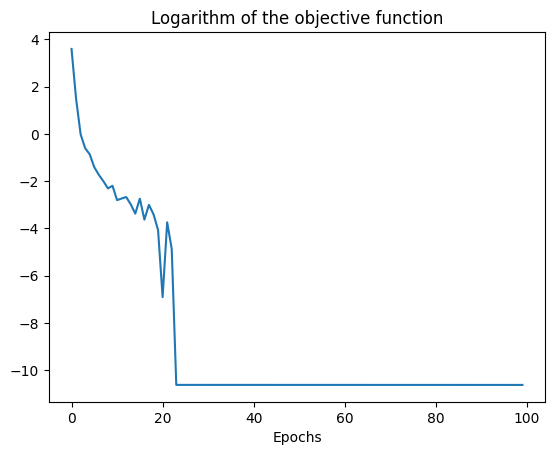

Increasing mu by 0.1
w = [-0.46530401 -0.50828541]
b = 1.6073683013074878


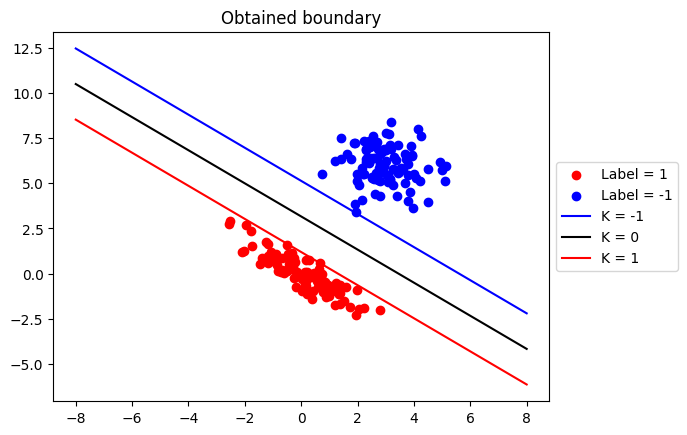

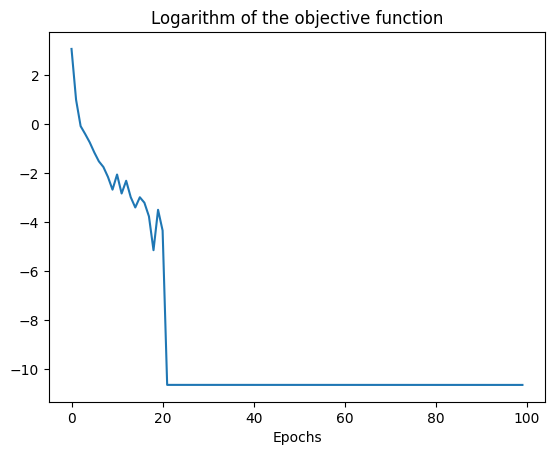

In [56]:
#Exercise 2
#Lambda= 1e-4, Batch size = 20
increased_mu = [1,0.5,0.1]
# x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = batch(x, y, 100,1e-4, mu,100,20)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

Let us change the batch size to  $50$.

Increasing mu by 1
w = [-0.49380878 -0.50389152]
b = 1.6191782737641531


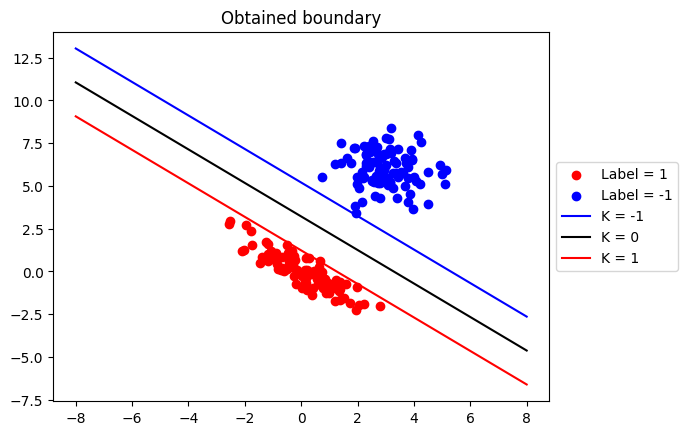

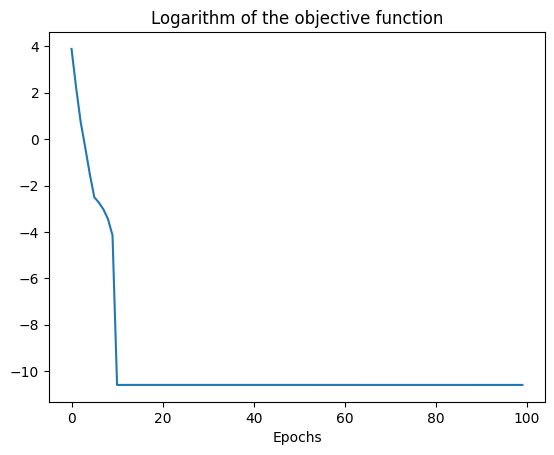

Increasing mu by 0.5
w = [-0.4670276  -0.50915905]
b = 1.6169786295613415


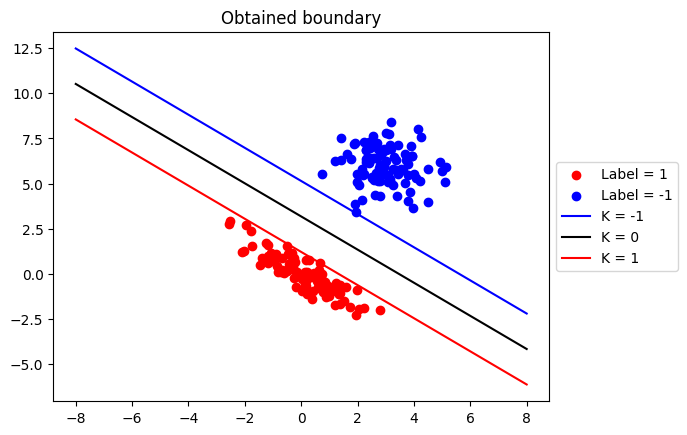

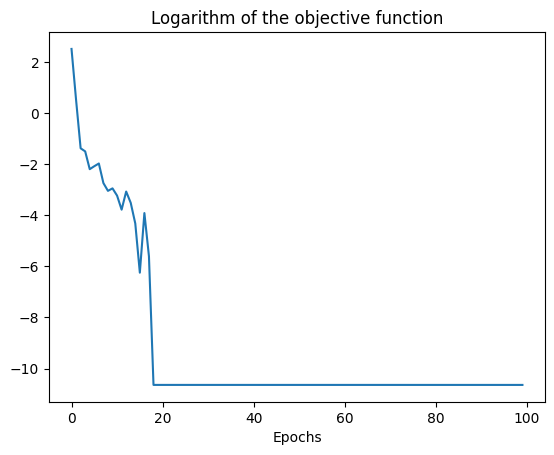

Increasing mu by 0.1
w = [-0.47248288 -0.5132797 ]
b = 1.6152079766761622


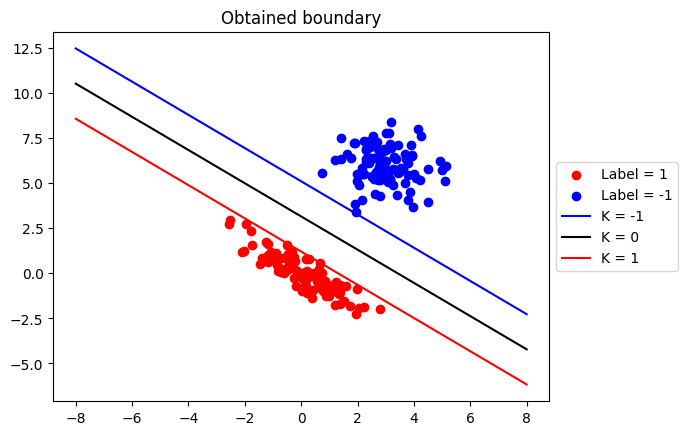

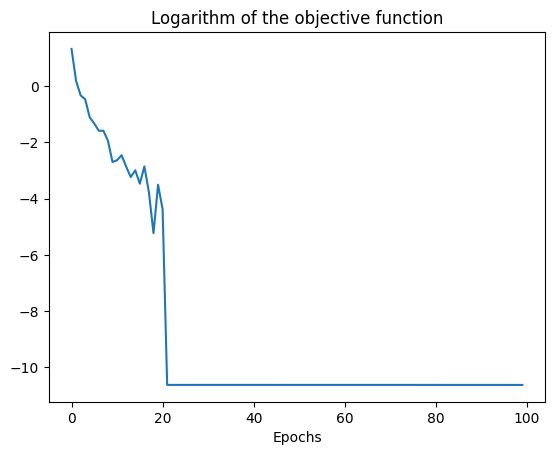

In [57]:
#Exercise 2
#Lambda= 1e-4, Batch size = 50
increased_mu = [1,0.5,0.1]
# x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = batch(x, y, 100,1e-4, mu,100,50)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

Let us now change $λ=10^{-2}$.

Batch size $= 10 $.




Increasing mu by 1
w = [-0.440618   -0.51918844]
b = 1.6102856490003878


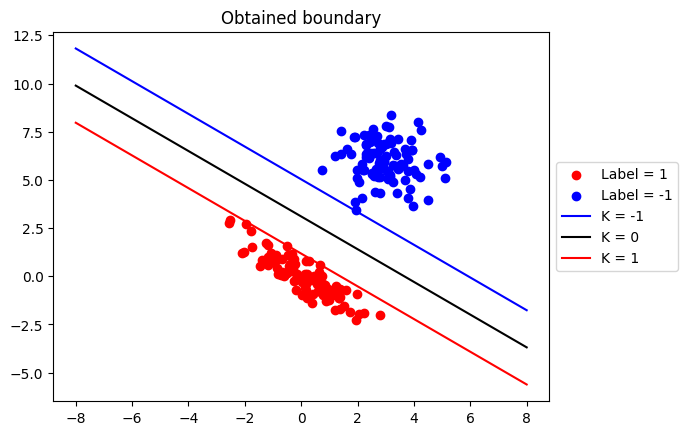

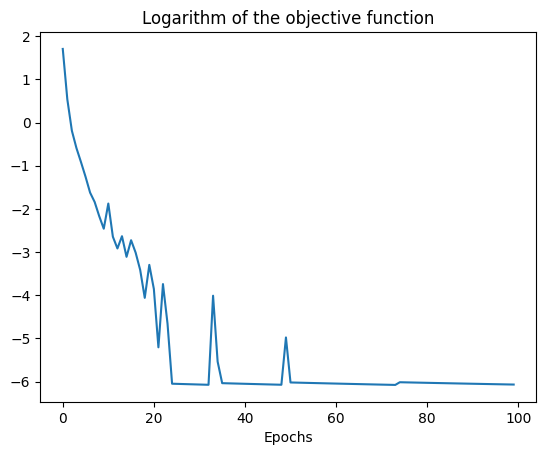

Increasing mu by 0.5
w = [-0.42972486 -0.51986171]
b = 1.6143034943979184


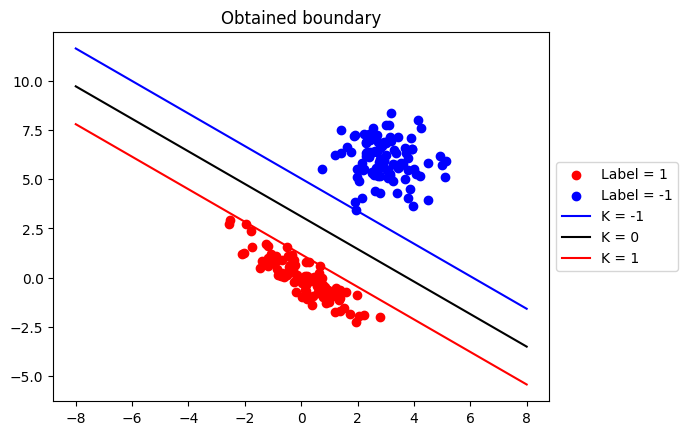

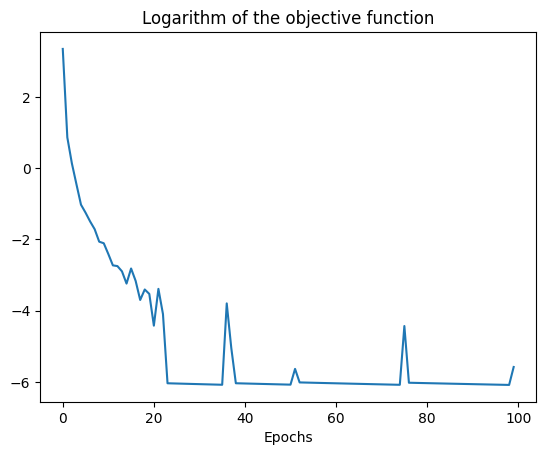

Increasing mu by 0.1
w = [-0.43772418 -0.518867  ]
b = 1.6259499108648185


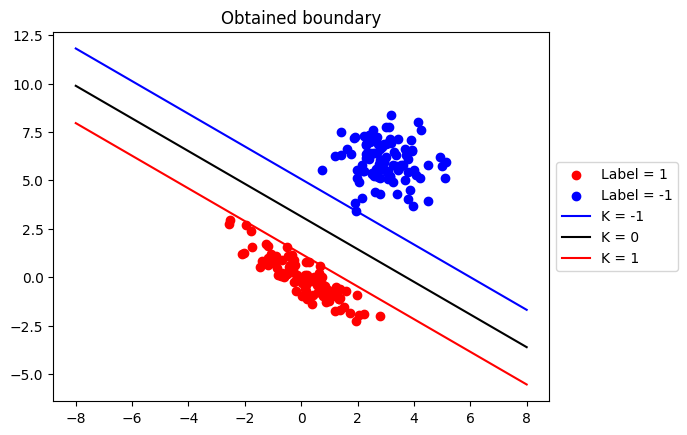

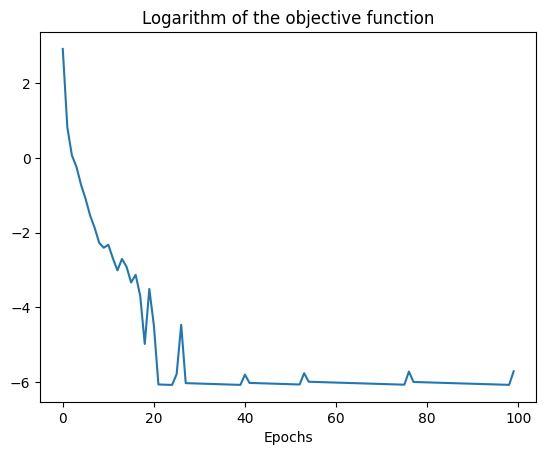

In [58]:
#Exercise 2
#Lambda= 1e-2, Batch size = 10
increased_mu = [1,0.5,0.1]
# x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = batch(x, y, 100,1e-2, mu,100,10)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

Batch size $= 20 $.

Increasing mu by 1
w = [-0.44389525 -0.51224063]
b = 1.6104257175768801


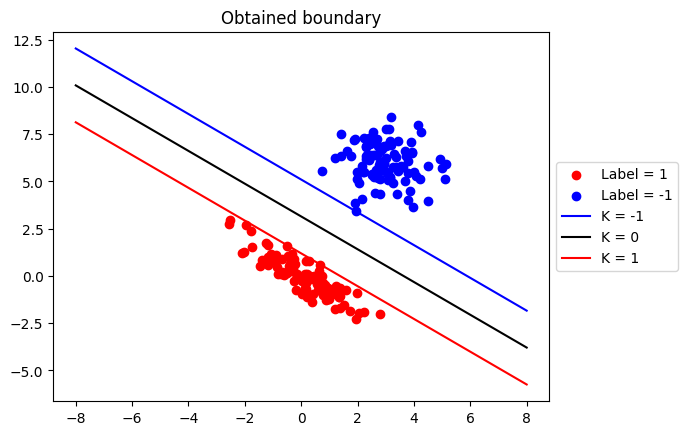

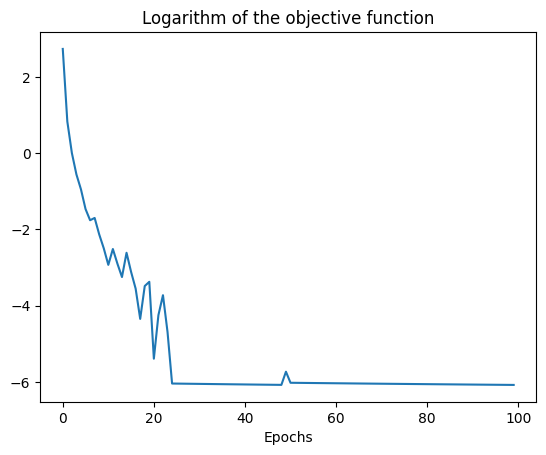

Increasing mu by 0.5
w = [-0.45926512 -0.52222444]
b = 1.6179357197324058


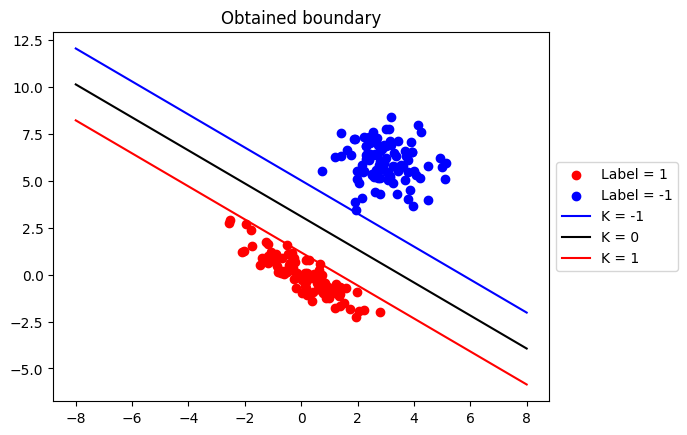

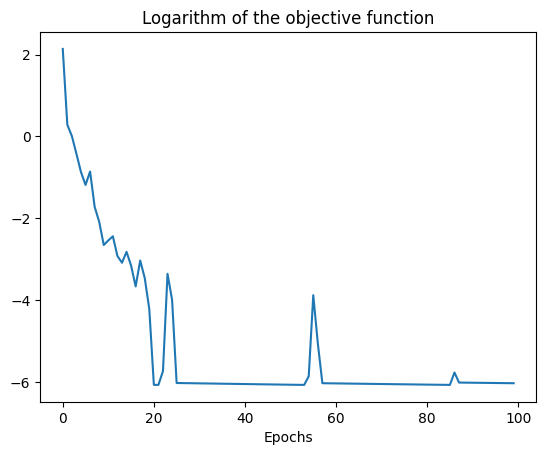

Increasing mu by 0.1
w = [-0.44626733 -0.52426459]
b = 1.6198192998849053


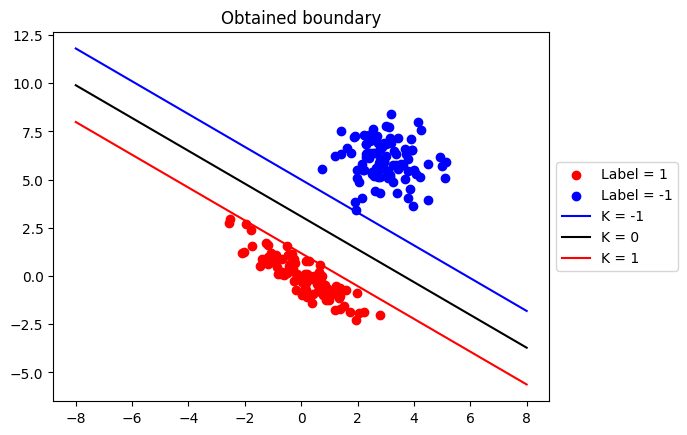

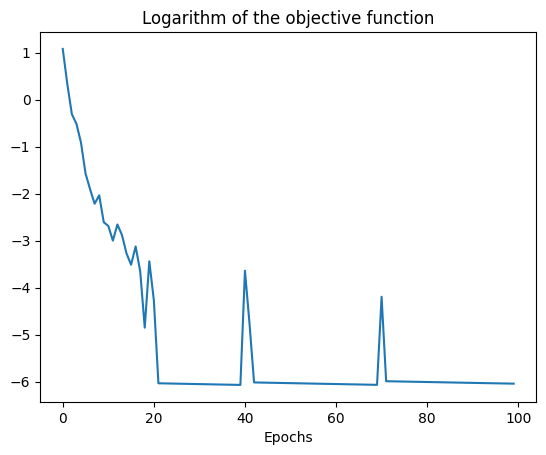

In [59]:
#Lambda= 1e-2, Batch size = 20
increased_mu = [1,0.5,0.1]
# x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = batch(x, y, 100,1e-2, mu,100,20)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

Batch size $= 50 $.


Increasing mu by 1
w = [-0.45018912 -0.52254387]
b = 1.6069437840473642


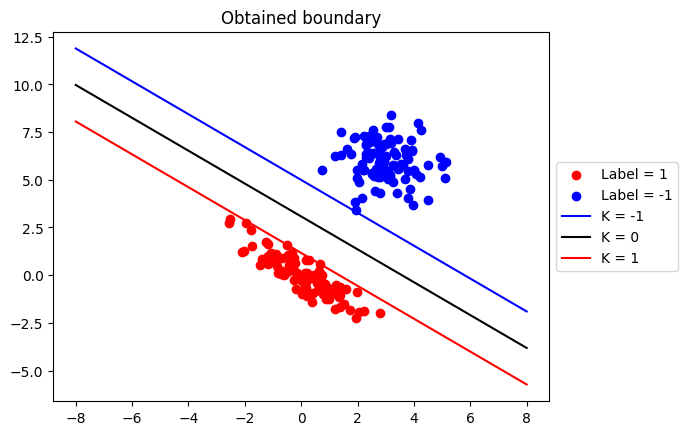

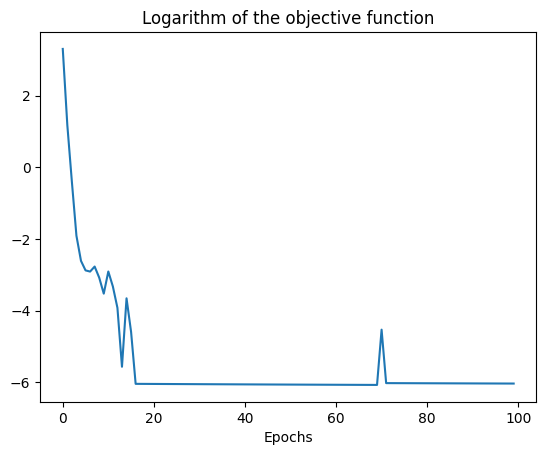

Increasing mu by 0.5
w = [-0.46728451 -0.52151552]
b = 1.6129409247289181


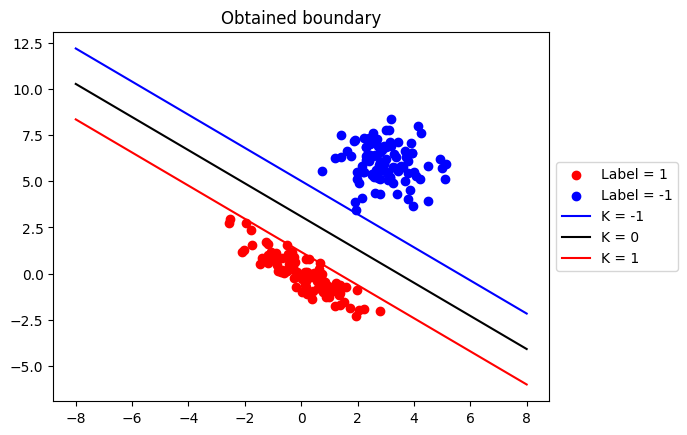

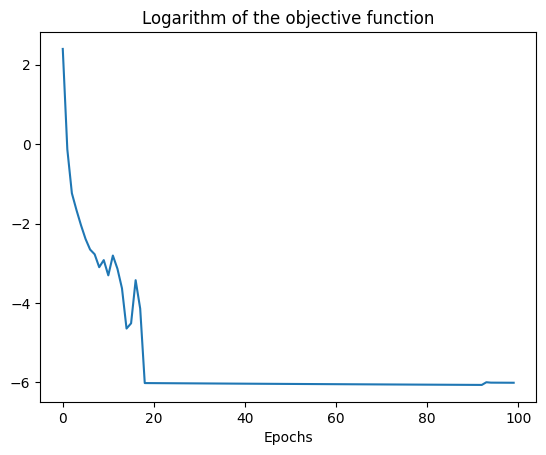

Increasing mu by 0.1
w = [-0.57908338 -0.59662636]
b = 1.7702162507675419


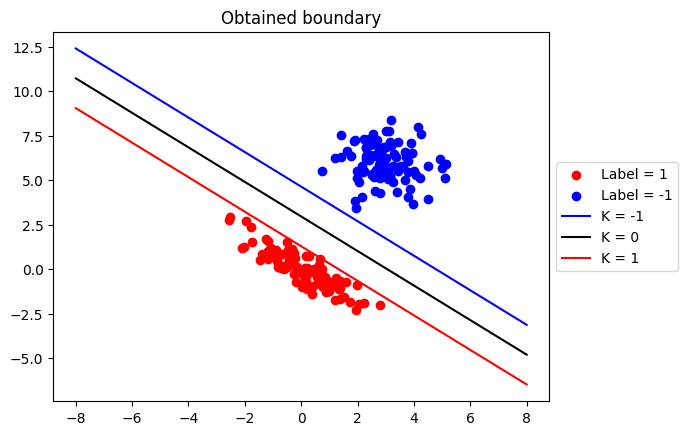

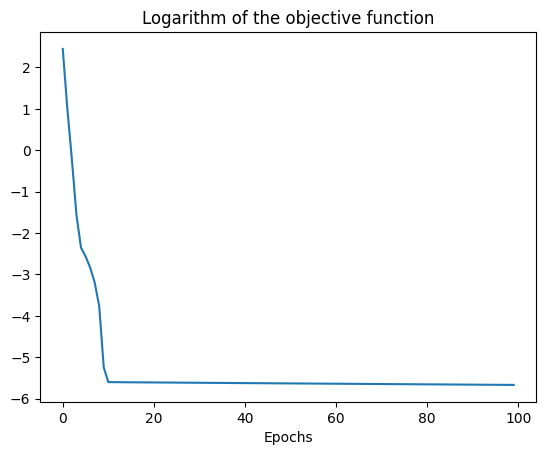

In [60]:
#Exercise 2
#Lambda= 1e-2, Batch size = 50
increased_mu = [1,0.5,0.1]
# x,y = generate_points(100)
for mu in increased_mu:
  w,b,f_values = batch(x, y, 100,1e-2, mu,100,50)
  print("Increasing mu by", mu )
  print("w =", w)
  print("b =", b)
  plot_boundary (x,w,b,f_values)

For $\lambda = 10^{-4}$ and for almost all the minibatch sizes we can see how the boundary at $K=0$ and at $K=1, K= -1$ fits really well and it gives really similar results. Nevertheless, when the minibatch size was $50$  and when we increased $\mu$ by 1 , we obtained that the hyperlane at $K= -1$ was more separated than usual.

For $\lambda = 10^{-2}$ we obtained good and similar results for minbatch sizes $=10,20$  but when the minibatch size was $50$ the results was not good at all. So it seems that a good option is to take smaller minibatch sizes.

Note that the results are sensible with the initials parameters $b$ and $w$. (We executed again the plots and the results with minibatch size equal to $50$ improved a little)

Respect to the logarithm of the objective function, note that we have a similar behaviour than before; for smaller $\lambda$ values the error decreases faster and in a more stable way. However, now we can see that for $\lambda = 10^{-2}$ (and regardless of the batch size) the oscillating behaviour of before has been significantly reduced. Also we can see than with  $\lambda = 10^{-4}$ we could have used less epochs, say 50, but with $\lambda = 10^{-2}$ in some cases it still fluctuates a little bit.

Increasing mu by 1
w = [-2.60816809 -2.68459515]
b = 4.288031339364848


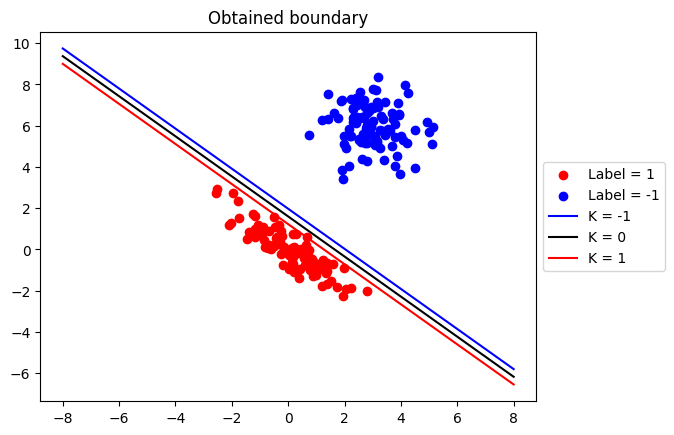

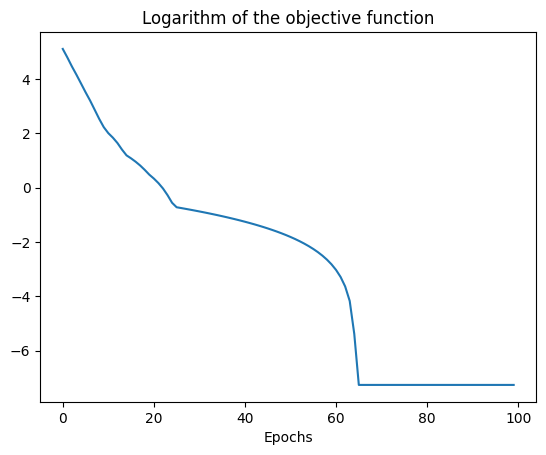

In [62]:
w,b,f_values = batch(x, y, 100,1e-4, 1,100,200)
print("Increasing mu by", 1 )
print("w =", w)
print("b =", b)
plot_boundary (x,w,b,f_values)

Finally, as suggested in the laboratory we computed the equivalent algorithm to gradient descent, that is, a mini-batch with a size equal to the number of samples. Note that, as expected and commented in the previous results, we do not get a good boundary (we are increasing the mini-batch size). In fact, we have tried with more epochs but the results does not get better.


# Exercise 3

As explained before, we have answered this questions during the two previous ones.